In [4]:
from sklearn.cluster import KMeans # using k-means algorithm  
from sklearn.datasets import make_classification



In [93]:
make_new = True
if make_new:   #generating classified dataset
    X, y = make_classification(n_samples=4000, n_features=20,
                           n_informative=6, n_redundant=0,
                           random_state=5, shuffle=False)
    numpy.savetxt("my-data-new.csv", X, delimiter=",")
    numpy.savetxt("my-labels-new.csv", y, delimiter=",")
else:
    X = numpy.loadtxt("my-data.csv", delimiter=",") # rename new file to this in order to reuse
    y = numpy.loadtxt("my-labels.csv", delimiter=",")

In [107]:
kmeans = KMeans(n_clusters=4).fit(X) # for this I'm using k=4 clusters 
 # fitting the data 

labels = kmeans.predict(X, y) # Retrieving cluster labels 
centroids = kmeans.cluster_centers_ #centroid values 

print(kmeans.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
print(centroids)
print(kmeans.importance_features_)

[1]
[[ 7.70156466e-01  1.81333852e+00  8.79036078e-01  2.10878904e+00
  -7.32085290e-01 -2.78218044e-01 -3.76804225e-02  3.17491665e-02
  -5.50193847e-03 -3.77415647e-02 -5.90238133e-02 -1.10266449e-01
  -5.18434834e-02  2.24089039e-02 -1.84066315e-02  1.70331665e-02
  -5.25395354e-03  1.44746835e-02 -4.77256484e-02  6.05693437e-03]
 [ 1.31216042e+00 -3.07139484e-01  1.94039797e+00  3.56060217e-01
   1.36378851e-01 -8.68200400e-01  6.48242047e-02  3.12698974e-02
  -5.94768127e-02  6.95663309e-02 -8.29440366e-03  6.10693525e-02
   8.45837551e-03 -2.74574477e-02  2.77064258e-02 -2.40022944e-02
   2.29008477e-02 -3.87953242e-02  3.06745333e-02 -4.62470453e-02]
 [-5.91409145e-02  1.14631632e+00  1.16321370e+00 -1.42901197e-01
  -1.30693917e+00  1.56812779e+00 -4.24812651e-02 -7.84683501e-02
  -4.44436149e-02  7.04507879e-02  3.01942559e-03 -3.34978002e-02
  -3.71270279e-02  1.76156159e-02 -1.66594804e-03  2.63651586e-02
  -1.57841646e-02  4.03283037e-02 -5.38442195e-03  2.96302770e-02]
 [-

AttributeError: 'KMeans' object has no attribute 'importance_features_'

###### import matplotlib.pyplot as plt
%matplotlib inline




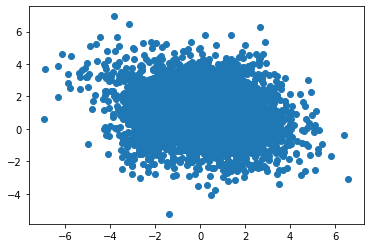

In [95]:
plt.scatter(X[:,0],X[:,1], label='True Position') #scatter plot of 4000 pts

In [91]:
print(y)

[0 0 0 ... 1 1 1]


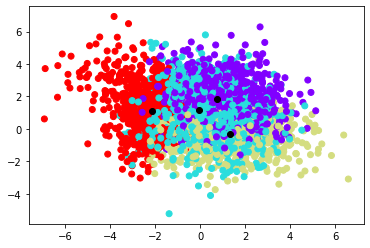

In [96]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') #clustering into k=4 clusters and coloring 

In [129]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X, y)
y_pred = knn.predict(X)
clean_dataset_score=knn.score(X, y) 

In [130]:
# matplotlib inline
import matplotlib

# Import the class
import kmapper as km
import sklearn

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0]) # X-Y axis

print("***")
print(stats.describe(projected_data))
print("***")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (4000, 20)

..Projecting data using: [0]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

***
DescribeResult(nobs=4000, minmax=(array([0.]), array([1.])), mean=array([0.51262491]), variance=array([0.01774746]), skewness=array([-0.00158739]), kurtosis=array([0.07362641]))
***


In [131]:
# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, 
                   clusterer=sklearn.cluster.KMeans(n_clusters=4).fit(X), 
                   cover=km.Cover(n_cubes=10, perc_overlap=0.3, limits=None, verbose=0), 
                   nerve=km.GraphNerve(min_intersection=1), precomputed=False, remove_duplicate_nodes=False, 
                   overlap_perc=None, nr_cubes=None)

Mapping on data shaped (4000, 20) using lens shaped (4000, 1)

Creating 10 hypercubes.

Created 82 edges and 40 nodes in 0:00:00.781299.


In [140]:
print(graph)

# Visualize it
mapper.visualize(graph, path_html="classifier_x10.html",
                 title="classifiers",
                 #color_function=y # y is the classification label light=0 dark=1
                 color_function=X[:,10] # coloring by the 6th coordinate projection
                )

{'nodes': defaultdict(<class 'list'>, {'cube0_cluster0': [2019, 2170, 2584, 2596, 2615, 2628, 2933], 'cube0_cluster3': [2083, 2085], 'cube0_cluster1': [2086, 2521], 'cube0_cluster2': [2815], 'cube1_cluster3': [67, 484, 824, 951], 'cube1_cluster0': [2028, 2149, 2196, 2203, 2348, 2460, 2520, 2593, 2608, 2950], 'cube1_cluster1': [2050, 2063, 2115, 2204, 2281, 2315, 2324, 2351, 2362, 2381, 2495, 2501, 2521, 2537, 2552, 2559, 2568, 2584, 2596, 2628, 2634, 2650, 2706, 2775, 2815, 2836, 2859, 2968, 2974], 'cube1_cluster2': [2163, 2211, 2220, 2232, 2300, 2794, 2973], 'cube2_cluster0': [5, 21, 41, 76, 153, 160, 224, 287, 359, 364, 378, 404, 425, 441, 741, 788, 824, 886, 946, 966, 974, 1205, 1237, 1374, 1570, 1642, 1743, 1958, 2026, 2032, 2049, 2082, 2125, 2165, 2171, 2195, 2244, 2250, 2423, 2427, 2460, 2504, 2520, 2532, 2588, 2591, 2608, 2610, 2639, 2660, 2685, 2768, 2797, 2799, 2800, 2848, 2891, 2950], 'cube2_cluster2': [18, 32, 67, 74, 108, 109, 112, 113, 204, 207, 208, 232, 247, 251, 259, 28

Wrote visualization to: classifier_x10.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>classifiers | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  f